# 3. 
Consider three stocks (Google, AAL, and Tesla) with prices from 2018/1/1 to 2021/10/1.
1. Show the time series plots historical prices of these three stocks.
2. Show the time series plots of log-returns of these three stocks.
3. Use the whole periods to summarize their expected returns and risk. Draw these three points on the 2D-plane.
4. Report the portfolio weight of the global-minimum portfolio.

## 載入套件與讀取資料


In [1]:
import pandas as pd
import numpy as np
#import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

csv_file = "stock_price(Google, AAL, and Tesla).csv"
data = pd.read_csv(csv_file)
data.head()


,Date,GOOGL,TSLA,AAL
0,2018-01-02,1073.209961,64.106003,52.990002
1,2018-01-03,1091.520020,63.450001,52.340000
2,2018-01-04,1095.760010,62.924000,52.669998
3,2018-01-05,1110.290039,63.316002,52.650002
4,2018-01-08,1114.209961,67.281998,52.130001


## 3.1 Show the time series plots historical prices of these three stocks.
step: 轉'Date'column 資料型態並設為index < br >
step: 畫圖


<AxesSubplot:xlabel='Date'>

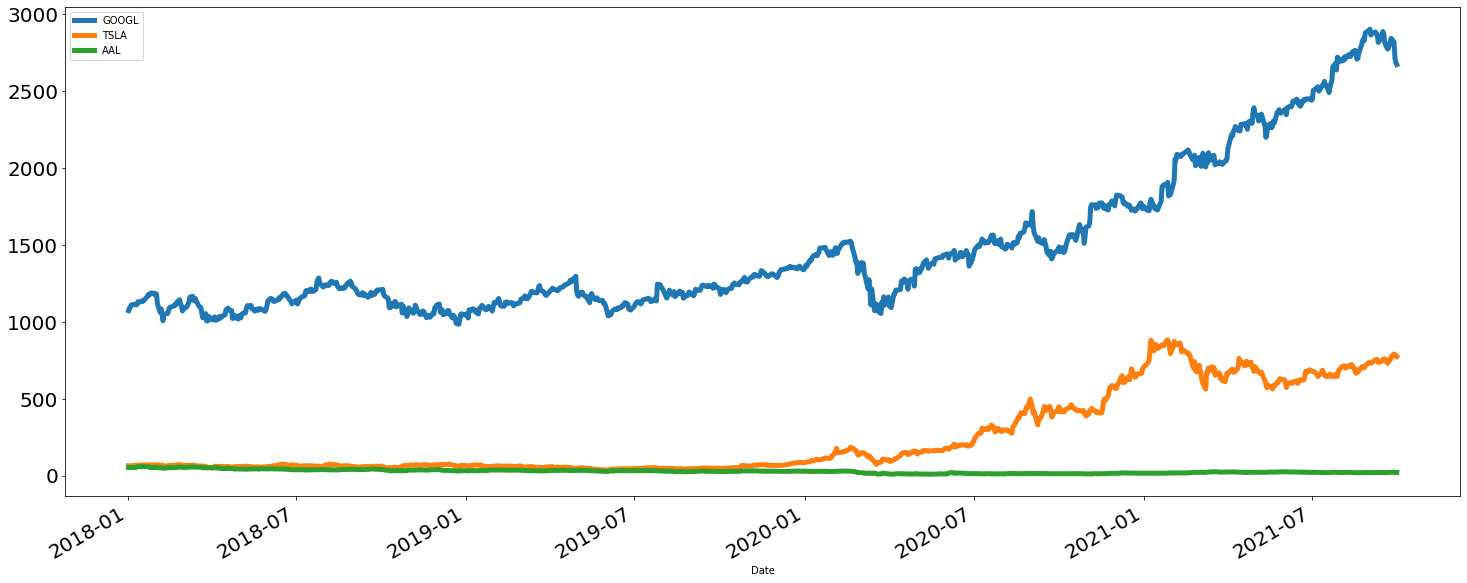

In [2]:
data.Date = pd.to_datetime(data.Date) # dtype: object -> datatime
data.set_index('Date', inplace = True) # 將'Data'欄位設為index
data.plot(figsize=(25,10), linewidth=5, fontsize=20) #畫圖

## 3.2 Show the time series plots of log-returns of these three stocks.
Let $S_t$ denote the stock price at day $t$. The log-return at day $t$ is 
$$r_t = \log\frac{S_t}{S_{t-1}}.$$

step - 利用公式算出各公司 log return<br>
step - 更新畫圖資料 = data_logre (drop掉'GOOGL','TSLA','AAL'欄位)<br>
step - 畫圖<br>

In [3]:
## 利用公式算出各公司log return
data['GOOGL log retutn'] = np.log(data['GOOGL']) - np.log(data['GOOGL'].shift(1))
data['TSLA log return'] =  np.log(data['TSLA']) - np.log(data['TSLA'].shift(1))
data['AAL log return'] =  np.log(data['AAL']) - np.log(data['AAL'].shift(1))
data

,GOOGL,TSLA,AAL,GOOGL log retutn,TSLA log return,AAL log return
Date,,,,,,
2018-01-02,1073.209961,64.106003,52.990002,NaN,NaN,NaN
2018-01-03,1091.520020,63.450001,52.340000,0.016917,-0.010286,-0.012342
2018-01-04,1095.760010,62.924000,52.669998,0.003877,-0.008325,0.006285
2018-01-05,1110.290039,63.316002,52.650002,0.013173,0.006210,-0.000380
2018-01-08,1114.209961,67.281998,52.130001,0.003524,0.060755,-0.009926
...,...,...,...,...,...,...
2021-09-24,2844.300049,774.390015,21.389999,0.007049,0.027161,0.023174
2021-09-27,2821.439941,791.359985,21.469999,-0.008070,0.021677,0.003733
2021-09-28,2716.600098,777.559998,21.430000,-0.037866,-0.017592,-0.001865


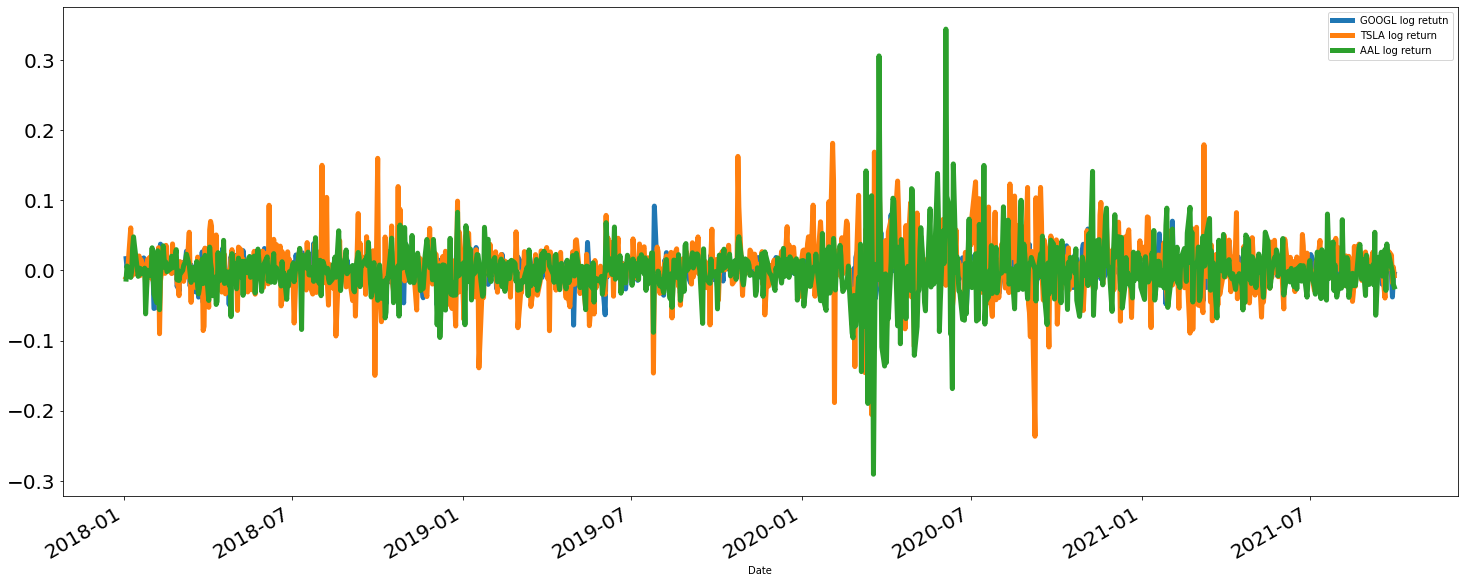

In [4]:
#Show the time series plots of log-returns of these three stocks.
coll = [0,1,2]
data_logre = data.drop(data.columns[coll], axis = 1)
# print(data_logre.head()) 
data_logre.plot(figsize=(25,10), linewidth=5, fontsize=20);

 ##  3.3 Use the whole periods to summarize their expected returns and risk. Draw these three points on the 2D-plane
 step - 算出 expected returns and risk<br>
 step - 畫圖

In [5]:
expected = data_logre.mean() # expected 
print(expected)
risk = data_logre.std() # risk
print(risk)

GOOGL log retutn    0.000968
TSLA log return     0.002644
AAL log return     -0.001006
dtype: float64
GOOGL log retutn    0.018673
TSLA log return     0.041074
AAL log return      0.039522
dtype: float64


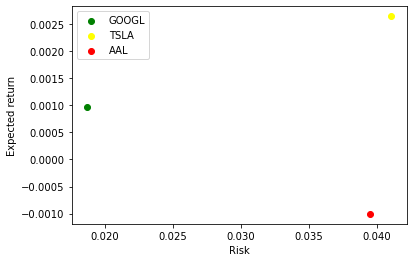

In [6]:
# Draw these three points on the 2D-plane
plt.scatter(risk[0],expected[0],color='green',label = 'GOOGL')
plt.scatter(risk[1],expected[1],color='yellow', label = 'TSLA')
plt.scatter(risk[2],expected[2],color='red', label = 'AAL')
plt.ylabel('Expected return')
plt.xlabel('Risk')
plt.legend()
plt.show()


## 3.4 Report the portfolio weight of the global-minimum portfolio.
step - 用data_logre算covariance_matrix<br>
step - 計算10000種投資組合<br>
step - 找出the portfolio weight of the global-minimum variance portfolio<br>

In [7]:
# 算 covarianc_matrix
cov_matrix = data_logre.cov()
cov_matrix

,GOOGL log retutn,TSLA log return,AAL log return
GOOGL log retutn,0.000349,0.000297,0.000211
TSLA log return,0.000297,0.001687,0.000353
AAL log return,0.000211,0.000353,0.001562


In [8]:
p_var = []  # Define an empty array for portfolio variance
p_weights = []  # Define an empty array for asset weights

num_assets = 3
num_portfolios = 10000
# 10000 種投資組合
for portfolio in range(num_portfolios):
    # weights
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # variance
    var = cov_matrix.mul(weights, axis=0).mul(
        weights, axis=1).sum().sum()  # Portfolio Variance
    p_var.append(var)
    
return_variance  = {'Variance': p_var}

for counter, symbol in enumerate(data.columns[0:3].tolist()):
    #print(counter, symbol)
    return_variance[symbol+'_weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(return_variance )
portfolios.head()

,Variance,GOOGL_weight,TSLA_weight,AAL_weight
0,0.001002,0.138835,0.122382,0.738782
1,0.000992,0.007795,0.552307,0.439898
2,0.000536,0.558173,0.400690,0.041137
3,0.000932,0.039505,0.483579,0.476915
4,0.000866,0.097958,0.501964,0.400078


In [17]:
#  Report the portfolio weight of the global-minimum variance portfolio.
print(portfolios[portfolios['Variance']==portfolios['Variance'].min()])

min_var_port = portfolios.iloc[portfolios['Variance'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_var_port
# GOOGL weight 0.887883,TSLA weight 0.024413 , AAL weight 0.087704

      Variance  GOOGL_weight  TSLA_weight  AAL_weight
8266  0.000335      0.887883     0.024413    0.087704


Variance        0.000335
GOOGL_weight    0.887883
TSLA_weight     0.024413
AAL_weight      0.087704
Name: 8266, dtype: float64

### solution
GOOGL weight 0.887883,TSLA weight 0.024413 , AAL weight 0.087704

# 4. 
Assume we have 100,000 USD. Follow 3 and perform a backtest: <br>
    1. Start with the first 60 days of return and calculate the portfolio weight of the global minimum portfolio. Report the portfolio weight and the number of shares to buy for each stock.<br>
    2. *A rolling-window backtest procedure* <br>
   [(Details)](https://docs.google.com/spreadsheets/d/1SEGhzMLycKQh425jmCKHCsiHKKfdKHXXMDCK0kjWinY/edit#gid=0): Hold a portfolio for the next 5 days. Roll the window to use the latest 60 dys of return and hold a portfolio for 5 days. Continue these steps till the end of the study period. Show the accumalative return of the global minium variance portfolio and compare it with the 1/3 portfolio. Hint: let $P_t$ denote the market value of the portfolio. The acccumulative return is calcuated as 
    $$accR_t = (\frac{P_t-P_0}{P_0})\times 100\%$$

## 4.1 Start with the first 60 days of return and calculate the portfolio weight of the global minimum portfolio. Report the portfolio weight and the number of shares to buy for each stock.

step : 先利用.copy()建立第四題專屬資料data_4,免得把data資料用亂<br>
step : 算出1-60 days con-matrix<br>
step : 計算 1000 種投資組合<br>
step : 找出the portfolio weight of the global-minimum variance portfolio<br>
step : 根據權重，用100,000USD買股票<br>

In [9]:
data_4 = data.copy()
data_4.head()

,GOOGL,TSLA,AAL,GOOGL log retutn,TSLA log return,AAL log return
Date,,,,,,
2018-01-02,1073.209961,64.106003,52.990002,NaN,NaN,NaN
2018-01-03,1091.520020,63.450001,52.340000,0.016917,-0.010286,-0.012342
2018-01-04,1095.760010,62.924000,52.669998,0.003877,-0.008325,0.006285
2018-01-05,1110.290039,63.316002,52.650002,0.013173,0.006210,-0.000380
2018-01-08,1114.209961,67.281998,52.130001,0.003524,0.060755,-0.009926


In [10]:
#Show only the log-returns of these three stocks.
coll = [0,1,2]
data_4_logre = data_4.drop(data_4.columns[coll], axis = 1)
data_4_logre.head()

,GOOGL log retutn,TSLA log return,AAL log return
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.016917,-0.010286,-0.012342
2018-01-04,0.003877,-0.008325,0.006285
2018-01-05,0.013173,0.006210,-0.000380
2018-01-08,0.003524,0.060755,-0.009926


In [11]:
cov_matrix = data_4_logre[1:61].cov()
cov_matrix

,GOOGL log retutn,TSLA log return,AAL log return
GOOGL log retutn,0.000402,0.000275,0.000250
TSLA log return,0.000275,0.000797,0.000291
AAL log return,0.000250,0.000291,0.000452


In [12]:
p_var = []  # Define an empty array for portfolio variance
p_weights = []  # Define an empty array for asset weights

num_assets = 3
num_portfolios = 1000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    var = cov_matrix.mul(weights, axis=0).mul(
        weights, axis=1).sum().sum()  # Portfolio Variance
    p_var.append(var)
    
return_variance = {'Variance': p_var}

for counter, symbol in enumerate(data_4.columns[0:3].tolist()):
    return_variance[symbol+'_weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(return_variance)
portfolios.head()

,Variance,GOOGL_weight,TSLA_weight,AAL_weight
0,0.000360,0.238337,0.264293,0.497369
1,0.000336,0.402941,0.095437,0.501621
2,0.000406,0.388794,0.456573,0.154634
3,0.000346,0.358687,0.241815,0.399498
4,0.000361,0.322105,0.317828,0.360067


In [13]:
#  Report the portfolio weight of the global-minimum portfolio.
print(portfolios[portfolios['Variance']==portfolios['Variance'].min()])
min_vol_port = portfolios.iloc[portfolios['Variance'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

     Variance  GOOGL_weight  TSLA_weight  AAL_weight
225  0.000331      0.503848     0.103999    0.392153


Variance        0.000331
GOOGL_weight    0.503848
TSLA_weight     0.103999
AAL_weight      0.392153
Name: 225, dtype: float64

In [14]:
data_4["GOOGL weight"] = np.nan
data_4['GOOGL weight'][60]= min_vol_port.GOOGL_weight
data_4["TSLA weight"] = np.nan
data_4['TSLA weight'][60]= min_vol_port.TSLA_weight
data_4["AAL weight"] = np.nan
data_4['AAL weight'][60]= min_vol_port.AAL_weight

In [15]:
money = 100000
data_4["GOOGL n"] = np.nan
data_4['GOOGL n'][60]= data_4['GOOGL weight'][60] * money / data_4['GOOGL'][60]
data_4["TSLA n"] = np.nan
data_4['TSLA n'][60]= data_4['TSLA weight'][60] * money / data_4['TSLA'][60]
data_4["AAL n"] = np.nan
data_4['AAL n'][60]= data_4['AAL weight'][60] * money / data_4['AAL'][60]

In [16]:
data_4.iloc[60,6:]


GOOGL weight      0.503848
TSLA weight       0.103999
AAL weight        0.392153
GOOGL n          48.580534
TSLA n          195.391775
AAL n           754.720214
Name: 2018-03-29 00:00:00, dtype: float64

### solution
GOOGL weight 0.518193, 買 49.548036 張<br>
TSLA weight 0.096872, 買 182.001956張<br>
AAL weight 0.389245, 買 749.124588張<br>

## 4.2 A rolling-window backtest procedure
Hold a portfolio for the next 5 days. Roll the window to use the latest 60 dys of return and hold a portfolio for 5 days.<br> 
Continue these steps till the end of the study period. <br>
Show the accumulative return of the global minium variance portfolio and compare it with the 1/3 portfolio.<br>

step : 利用 forloop 實現 the accumulative return of the global minium variance portfolio.<br>
step : 利用 forloop 實現 the accumulative return of the 1/3 portfolio<br>
step : 畫出 the accumulative return of the global minium variance portfolio and compare it with the 1/3 portfolio.<br>

In [17]:
# 利用 forloop 實現 the accumulative return of the global minium variance portfolio
money = 100000
data_4["portfolio value"] = np.nan
data_4['accrt'] = np.nan

for i in range(60, 944, 5):
    for j in range(i, i+5):
        if j == 944:
            break
        # 1 - 60 天先前已經算完
        # 更新表格
        data_4['GOOGL weight'][j]= min_vol_port.GOOGL_weight
        data_4['TSLA weight'][j]= min_vol_port.TSLA_weight
        data_4['AAL weight'][j]= min_vol_port.AAL_weight
        data_4['GOOGL n'][j]=  data_4['GOOGL weight'][j]* money / data_4['GOOGL'][i]
        data_4['TSLA n'][j]= data_4['TSLA weight'][j] * money / data_4['TSLA'][i]
        data_4['AAL n'][j]= data_4['AAL weight'][j] * money / data_4['AAL'][i]
        data_4['portfolio value'][j] = data_4['GOOGL'][j] * data_4['GOOGL n'][j] + data_4['TSLA'][j] * data_4['TSLA n'][j] + data_4['AAL'][j] * data_4['AAL n'][j]
        data_4['accrt'][j] = (data_4['portfolio value'][j] - 100000) / data_4['portfolio value'][j]
        if j == i + 4:      
            money = data_4['GOOGL n'][j]*data_4['GOOGL'][j+1] + data_4['TSLA n'][j]*data_4['TSLA'][j+1] + data_4['AAL n'][j]*data_4['AAL'][j+1]
        
    # 算出權重
    cov_matrix = data_4_logre[i+1-60:i+1].cov()
    p_var = []  # Define an empty array for portfolio variance
    p_weights = []  # Define an empty array for asset weights

    num_assets = 3
    num_portfolios = 1000
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        var = cov_matrix.mul(weights, axis=0).mul(
            weights, axis=1).sum().sum()  # Portfolio Variance
        p_var.append(var)
    
    return_variance = {'Variance': p_var}

    for counter, symbol in enumerate(data_4.columns[0:3].tolist()):
        return_variance[symbol+'_weight'] = [w[counter] for w in p_weights]
    portfolios = pd.DataFrame(return_variance)
#     print(portfolios[portfolios['Variance']==portfolios['Variance'].min()])
    min_vol_port = portfolios.iloc[portfolios['Variance'].idxmin()]
print(data_4['accrt']) # 印出 accumulative return 

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2021-09-24    0.556939
2021-09-27    0.555478
2021-09-28    0.539978
2021-09-29    0.535973
2021-09-30    0.533316
Name: accrt, Length: 944, dtype: float64


In [27]:
# 利用 forloop 實現 the accumulative return of the 1/3 portfolio
data_4['B_GOOGL weight'] = np.nan
data_4['B_TSLA weight'] = np.nan
data_4['B_AAL weight'] = np.nan
data_4['B_GOOGL n'] = np.nan
data_4['B_TSLA n'] = np.nan
data_4['B_AAL n'] = np.nan
data_4['B_portfolio value'] = np.nan
data_4['B_accrt'] = np.nan
for i in range(60,944):
    # 張數權重皆相同
    data_4['B_GOOGL weight'][i] = 1/3
    data_4['B_TSLA weight'][i] = 1/3
    data_4['B_AAL weight'][i] = 1/3
    data_4['B_GOOGL n'][i] = 1/3 * 100000 / data_4['GOOGL'][60]
    data_4['B_TSLA n'][i] = 1/3 * 100000 / data_4['TSLA'][60]
    data_4['B_AAL n'][i] = 1/3 * 100000 / data_4['AAL'][60]
    data_4['B_portfolio value'][i] = data_4['GOOGL'][i] * data_4['B_GOOGL n'][i] + data_4['TSLA'][i] * data_4['B_TSLA n'][i] + data_4['AAL'][i] * data_4['B_AAL n'][i]
    data_4['B_accrt'][i] = (data_4['B_portfolio value'][i] - 100000) / data_4['B_portfolio value'][i]
print(data_4['B_accrt']) # 印出 accumulative return 

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2021-09-24    0.830539
2021-09-27    0.833347
2021-09-28    0.829936
2021-09-29    0.830262
2021-09-30    0.828985
Name: B_accrt, Length: 944, dtype: float64


In [28]:
# 觀察一下資料
data_4.iloc[60:80, 6:] 

,GOOGL weight,TSLA weight,AAL weight,GOOGL n,TSLA n,AAL n,portfolio value,accrt,B_GOOGL weight,B_TSLA weight,B_AAL weight,B_GOOGL n,B_TSLA n,B_AAL n,B_portfolio value,B_accrt
Date,,,,,,,,,,,,,,,,
2018-03-29,0.513883,0.096872,0.389245,49.548036,182.001956,749.124588,100000.000000,-1.455192e-16,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,100000.000000,-1.455192e-16
2018-04-02,0.513883,0.096872,0.389245,49.548036,182.001956,749.124588,96655.619375,-3.460100e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,96104.051785,-4.053885e-02
2018-04-03,0.513883,0.096872,0.389245,49.548036,182.001956,749.124588,98769.233046,-1.246104e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,99267.710190,-7.376919e-03
2018-04-04,0.513883,0.096872,0.389245,49.548036,182.001956,749.124588,100449.278683,4.472692e-03,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,102419.017966,2.361884e-02
2018-04-05,0.513883,0.096872,0.389245,49.548036,182.001956,749.124588,101352.967846,1.334907e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,104929.573966,4.697983e-02
2018-04-06,0.531065,0.095608,0.373327,51.851947,157.497678,732.023586,98609.152863,-1.410465e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,102209.396954,2.161638e-02
2018-04-09,0.531065,0.095608,0.373327,51.851947,157.497678,732.023586,98487.224647,-1.536012e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,101026.348068,1.015921e-02
2018-04-10,0.531065,0.095608,0.373327,51.851947,157.497678,732.023586,98084.290526,-1.953126e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,101923.564289,1.887262e-02
2018-04-11,0.531065,0.095608,0.373327,51.851947,157.497678,732.023586,95864.387583,-4.314024e-02,0.333333,0.333333,0.333333,32.139666,626.260328,641.519129,99762.161647,-2.384054e-03


In [29]:
# 準備畫圖,留下'accrt','B_accrt'，方便畫圖與觀察
col = ['accrt','B_accrt']
data_plot = data_4[col][60:]
data_plot.rename(columns={'accrt': 'the accumulative return of the global minium variance portfolio', 
                           'B_accrt': 'the accumulative return of 1/3 portfolio'}, inplace=True)
data_plot.head()

,the accumulative return of the global minium variance portfolio,the accumulative return of 1/3 portfolio
Date,,
2018-03-29,-1.455192e-16,-1.455192e-16
2018-04-02,-3.460100e-02,-4.053885e-02
2018-04-03,-1.246104e-02,-7.376919e-03
2018-04-04,4.472692e-03,2.361884e-02
2018-04-05,1.334907e-02,4.697983e-02


<AxesSubplot:xlabel='Date'>

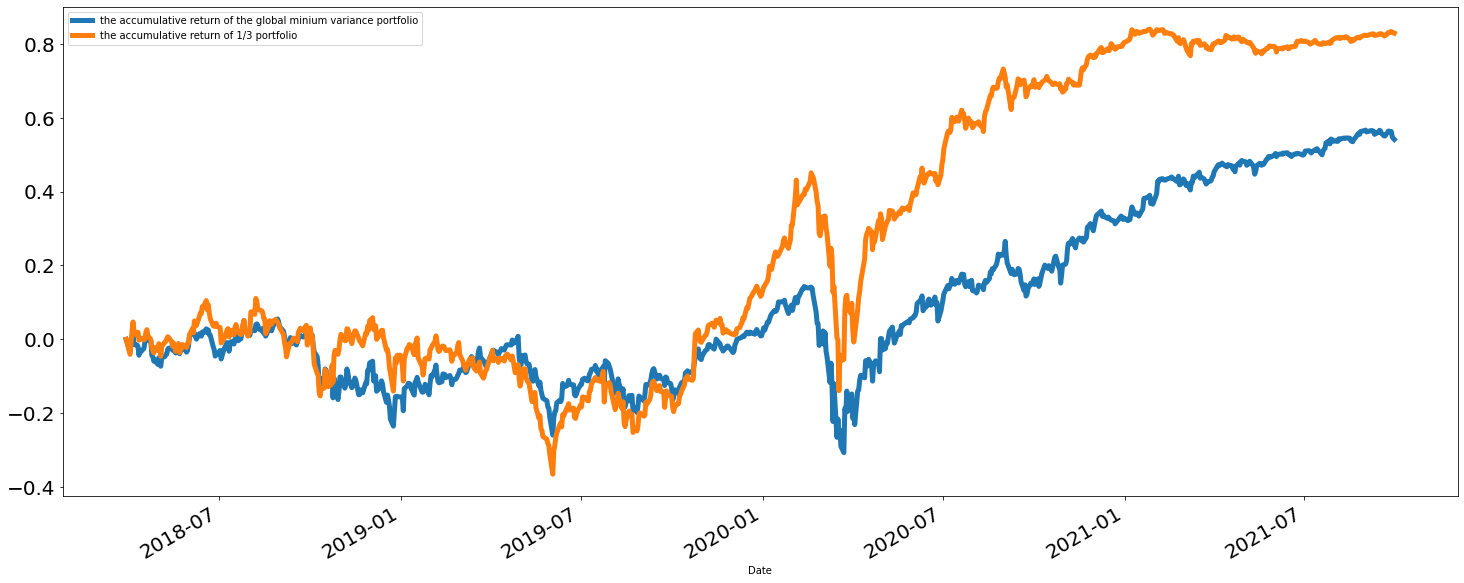

In [30]:
data_plot.plot(figsize=(25,10), linewidth=5, fontsize=20) #畫圖